In [3]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [4]:
# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [7]:
X = iris.data
Y = iris.target

In [8]:
Y.shape

(150,)

In [9]:
X.shape

(150, 4)

In [11]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [12]:
# put this data into pandas dataframe

iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [10]:
iris_target = DataFrame(Y,columns=['Species'])

In [13]:
iris_data.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
def flower(num):
    if num== 0:
        return 'Setosa'
    elif num== 1:
        return 'Versicolor'
    else:
        return 'Virginica'

In [17]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [18]:
iris_target.head()

,Species
0,Virginica
1,Virginica
2,Virginica
3,Virginica
4,Virginica


In [19]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [20]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Virginica
1,4.9,3.0,1.4,0.2,Virginica
2,4.7,3.2,1.3,0.2,Virginica
3,4.6,3.1,1.5,0.2,Virginica
4,5.0,3.6,1.4,0.2,Virginica


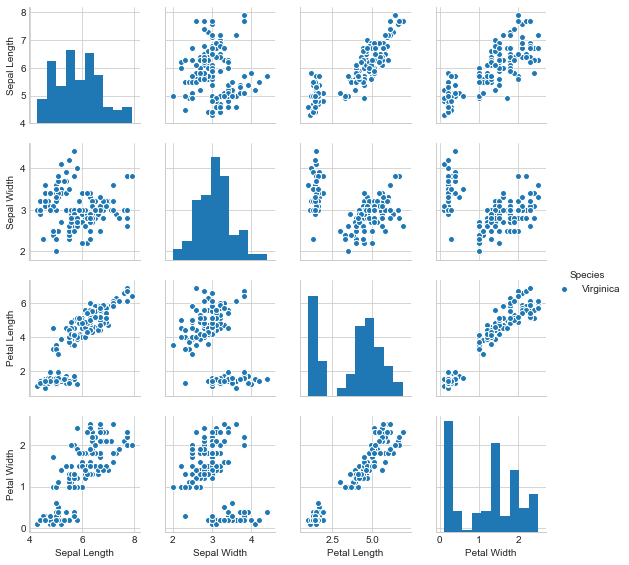

In [21]:
sns.pairplot(iris,hue='Species',size=2)

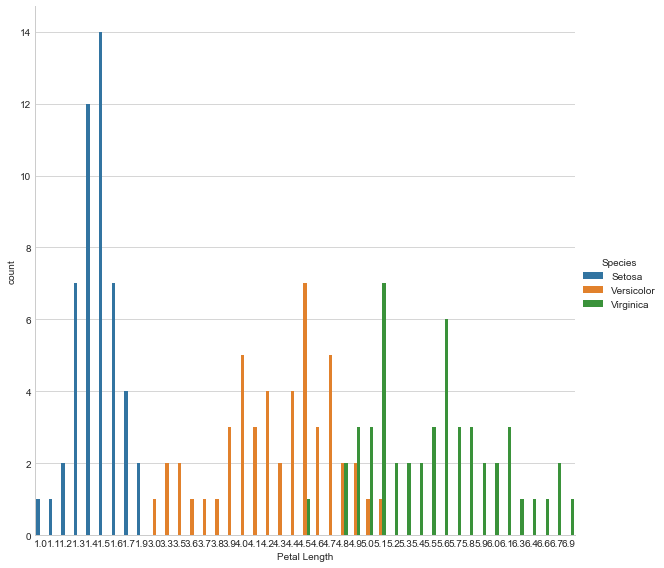

In [26]:
sns.factorplot('Petal Length',data=iris, kind ='count',hue='Species',size=8)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [23]:
logreg = LogisticRegression()

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)

In [24]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn import metrics

In [27]:
Y_pred = logreg.predict(X_test)

In [28]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9333333333333333


In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors = 6)

In [37]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [47]:
Y_pred = knn.predict(X_test)

In [39]:
print (metrics.accuracy_score(Y_test,Y_pred))

0.95


In [42]:
knn = KNeighborsClassifier(n_neighbors=1)

In [43]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [74]:
Y_pred = knn.predict(X_test)

In [80]:
print(accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [66]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 

In [75]:
Y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [76]:
Y_test

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1])

In [94]:
accuracy_score(Y_test, Y_pred)

0.9666666666666667

In [1]:
k_range = range(1,21)

accuracy = []

In [31]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0,0.5,'Testing Accuracy')

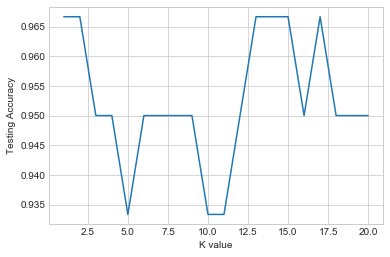

In [32]:
plt.plot(k_range,accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')